## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Data

In [2]:
df = pd.read_csv('../data/processed/DataScientist_cleaned.csv')

## Preprocess Text Data


In [3]:
# Function to preprocess text
def preprocess_text(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    # Join tokens back to string
    return ' '.join(tokens)

# Apply preprocessing to the job descriptions
df['cleaned_job_description'] = df['Job Description'].apply(preprocess_text)

## Vectorize Text Data

In [4]:
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_job_description'])


## Apply Clustering Algorithm


In [5]:
# Apply KMeans clustering
num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign clusters to job descriptions
df['cluster'] = kmeans.labels_


C:\Users\krist\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Analyze and Visualize Clusters


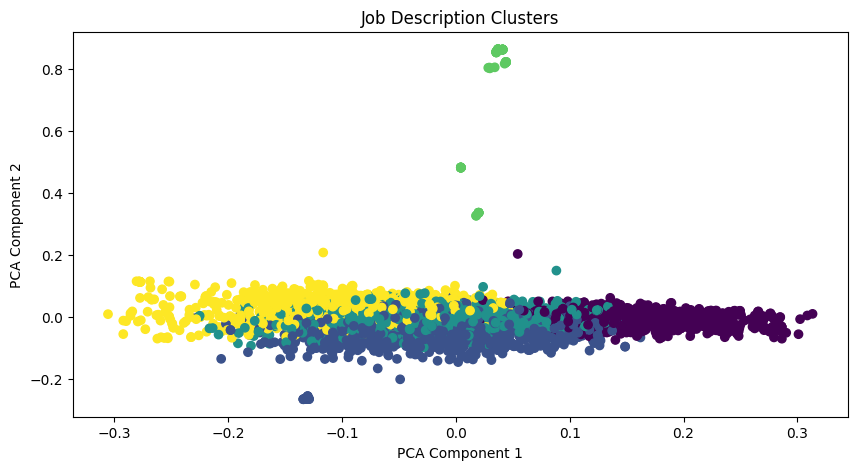

Cluster 0 top terms:
 laboratory
 research
 clinical
 scientific
 cell
 development
 work
 required
 biology
 scientist

Cluster 1 top terms:
 business
 analytics
 work
 analysis
 analyst
 management
 ability
 skills
 reporting
 team

Cluster 2 top terms:
 engineer
 cloud
 aws
 years
 spark
 sql
 work
 business
 big
 skills

Cluster 3 top terms:
 ibm
 quantum
 progressive
 qiskit
 world
 career
 crm
 expertise
 business
 170

Cluster 4 top terms:
 learning
 machine
 science
 models
 business
 team
 ml
 algorithms
 work
 statistical



In [6]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 5))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Job Description Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Print cluster centers (top terms per cluster)
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print(f"Cluster {i} top terms:")
    for ind in order_centroids[i, :10]:  # Print top 10 terms per cluster
        print(f' {terms[ind]}')
    print()
